In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [16]:
def plot_gallery(images):
# Affiche les 12 premières images contenues dans images
# images est de taille Nb image*Ny*Nx plt.figure(figsize=(7.2, 7.2))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35) 
  for i in range(12):
    plt.subplot(3, 4, i + 1) 
    plt.imshow(images[i], cmap=plt.cm.gray) 
    plt.xticks(())
    plt.yticks(())
  plt.show()

taille des images 62x47 = 2914
nombre d'images = 1288
nombde de classe 7
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


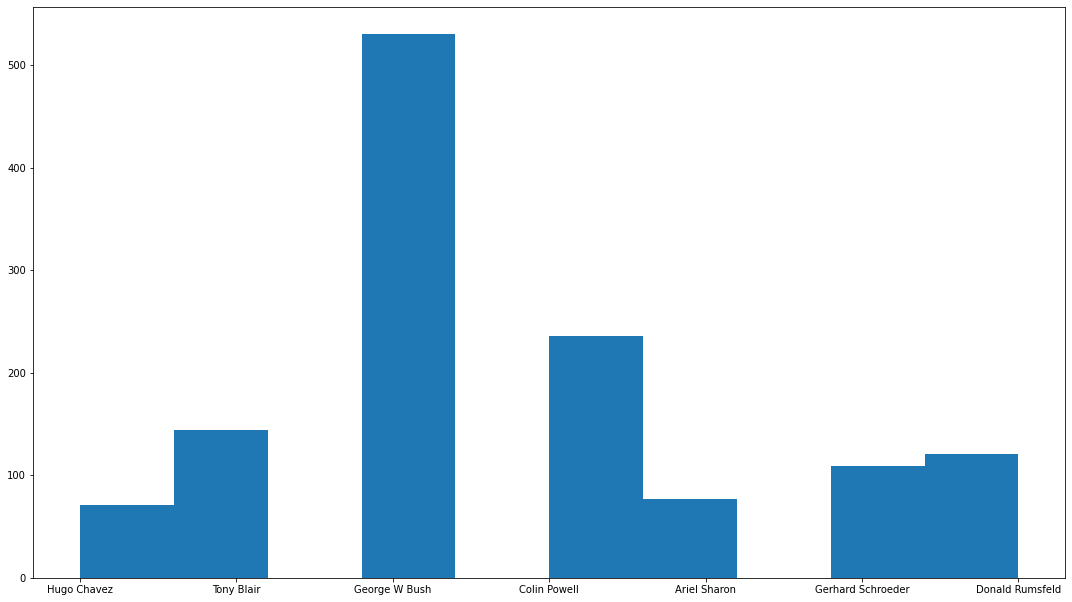

In [21]:
[X, y, name]=np.load("TP1.npy",allow_pickle=True )
print("taille des images ",np.shape(X[0])[0],"x",np.shape(X[0])[1]," = ",np.size(X[0]),sep='')
print("nombre d'images =",len(X))
print("nombde de classe",len(name))
print(name)
fig = plt.figure(1)
plt.hist([name[i] for i in y ])
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()


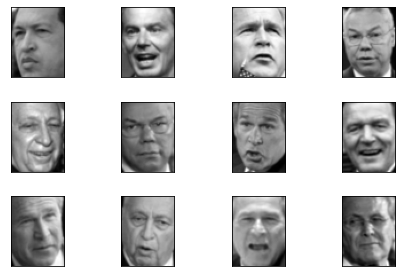

In [ ]:
plot_gallery(X)

In [22]:
def train_test_split(X):
  X_test = []
  y_test = []
  liste = np.random.choice(range(len(X)),int(len(X)*0.25),replace=False)
  # Random va influer sur les plots à la fin du TP1 a chaque fois qu'on va re executer 
  # ces plots sont (fitness. Meilleur fitness == bon algo . Evolution de la fitness fonction du nombre de voisins)
  for i in liste:
    X_test.append(X[i])
    y_test.append(y[i])
  X_train = [_ for i , _ in enumerate(X) if i not in liste ]
  y_train = [_ for i , _ in enumerate(y) if i not in liste ]

  return X_train, y_train, X_test, y_test 


In [23]:
X_train, y_train, X_test, y_test = train_test_split(X)


In [24]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(966, 62, 47)
(966,)
(322, 62, 47)
(322,)


In [25]:
X_train = np.reshape(X_train,(np.shape(X_train)[0],np.shape(X)[1] * np.shape(X)[2]))
X_test = np.reshape(X_test,(np.shape(X_test)[0],np.shape(X)[1] * np.shape(X)[2]))

In [26]:
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
# données moyenné centré 

In [27]:
neigh = KNeighborsClassifier( n_neighbors=1, metric='euclidean')
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
print(confusion_matrix(y_pred=y_pred, y_true=y_test))
print(confusion_matrix(y_pred=y_pred, y_true=y_test).trace())
print(accuracy_score(y_test, y_pred, normalize=False))

[[ 9  7  0  3  0  0  1]
 [ 1 36  3  9  1  0  3]
 [ 0  5 16  7  1  0  1]
 [ 2 14  4 92  3  5  9]
 [ 0  3  3 13  9  1  9]
 [ 0  0  0  5  0  8  0]
 [ 1  3  2  7  4  2 20]]
190
190


In [28]:
scores = []
k_liste = list(range(1,10))
for k in k_liste:
  neigh = KNeighborsClassifier( n_neighbors=k,metric='euclidean')
  neigh.fit(X_train, y_train)
  y_pred = neigh.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred, normalize=False))

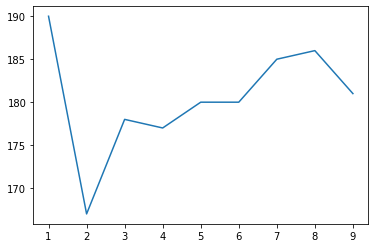

In [29]:
plt.plot(k_liste,scores)

In [30]:
scores = []
k_liste = list(range(1,10))
for k in k_liste:
  neigh = KNeighborsClassifier( n_neighbors=k,metric='manhattan')
  neigh.fit(X_train, y_train)
  y_pred = neigh.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred, normalize=False))

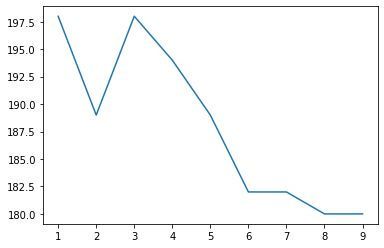

In [31]:
plt.plot(k_liste,scores)

### TP n°2 


In [91]:
#Combien y a-t-il de données en apprentissage et en test ? Quelle est la dimension des données après redimensionnement ?

print("donnés (images) en apprentissage : " , len(X_train) , "\n") 
print("donnés (images)  en test  : " , len(X_test) , "\n") 

print("Dimensions de X_train apres redimensionnement : " , np.shape(X_train))
print("Dimensions de X_test apres redimensionnement : " , np.shape(X_test))
print("Dimensions de y_train apres redimensionnement : " , np.shape(y_train))
print("Dimensions de y_test apres redimensionnement : " , np.shape(y_test))





donnés (images) en apprentissage :  966 

donnés (images)  en test  :  322 

Dimensions de X_train apres redimensionnement :  (966, 2914)
Dimensions de X_test apres redimensionnement :  (322, 2914)
Dimensions de y_train apres redimensionnement :  (966,)
Dimensions de y_test apres redimensionnement :  (322,)


In [92]:
# II. Analyse en composantes principales et classification

In [93]:
from sklearn.decomposition import PCA

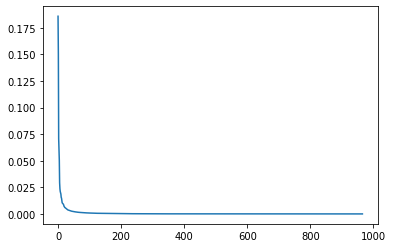

In [94]:
pca = PCA() # pas d'argument == prend automatiquement le nombre max de composnates (de base == 966)
pca.fit(X_train)
x = np.arange(0,966,1)
plt.plot(x , pca.explained_variance_ratio_)

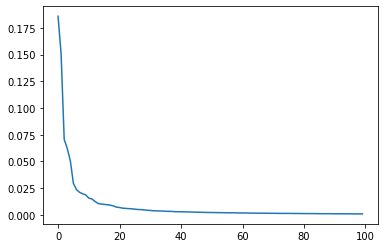

In [95]:
pca = PCA(n_components = 100) # pas d'argument == prend automatiquement le nombre max de composnates (de base == 966)
pca.fit(X_train)
x = np.arange(0,100,1)
plt.plot(x , pca.explained_variance_ratio_)

#### pca.explained_variance_ratio_  renvoie le pourcentage de participation de chaque valeur à la variance 

In [96]:
# transformez les données X_train et X_test pour obtenir X_train1 et X_test1

In [97]:
X_train1 = pca.transform(X_train) # Effectue la ACP 
X_test1  = pca.transform(X_test)
print(np.shape(X_test1))
print(np.shape(X_train1))

(322, 100)
(966, 100)


In [98]:
# . Réaliser la classification sur les données de départ puis sur les nouvelles données avec la méthode du 5PPV et la distance de Manhattan

In [99]:
from time import perf_counter



k = 5 
neigh = KNeighborsClassifier( n_neighbors=k,metric='manhattan')
tps1 = perf_counter()
neigh.fit(X_train, y_train)
tps2 = perf_counter()

y_pred = neigh.predict(X_test)
print("Score sans PCA : ", accuracy_score(y_test, y_pred, normalize=False))
print("Durée de classification sans PCA : ",tps2 - tps1)


tps1 = perf_counter()
neigh.fit(X_train1, y_train)
tps2 = perf_counter()

y_pred = neigh.predict(X_test1)
print("Score avec PCA : ", accuracy_score(y_test, y_pred, normalize=False))
print("Durée de classification avec PCA : ",tps2 - tps1)

# Plus rapide avec la PCA et meilleur taux de reconnaissance 

Score sans PCA :  189
Durée de classification sans PCA :  0.006267607000154385
Score avec PCA :  200
Durée de classification avec PCA :  0.0007719420000285027


### III. Analyse en composantes principales et reconstruction

In [103]:
pca = PCA(n_components = 50) 
pca.fit(X_train) # On fit sur nos données d'entrainement 

PCA(n_components=50)

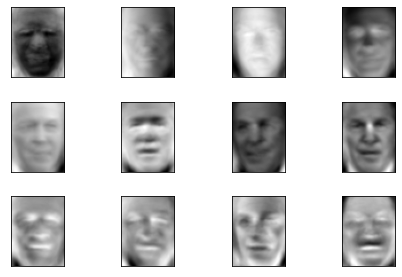

In [101]:
V_p = pca.components_  # Vecteur propre
Vp_r = np.reshape(V_p,(50,62,47))
plot_gallery(Vp_r)

# On a baissé la dimmension de images

In [ ]:
# Que représentent les vecteurs propres ? Quelle est leur taille ?

# - Vecteurs propres : données de train (projection) dans l'espace réduit 

In [ ]:
# Question 3 

In [105]:
pca = PCA(n_components = 50)
pca.fit(X_train)
XtestC =  pca.transform(X_test)


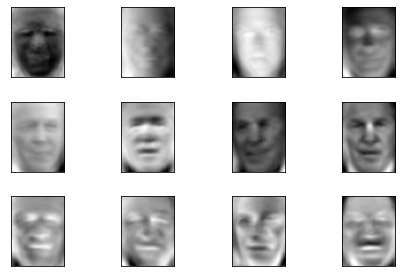

In [107]:
V_p = pca.components_  # Vecteurs propres
Vp_r = np.reshape(V_p,(50,62,47))
plot_gallery(Vp_r)

# Influence de random dans la partie 1 

In [ ]:
""" Reconstruisez les images à partir X_testC pour obtenir les images X_testR à partir d’une
des méthodes de PCA(). Afficher les images reconstruites et les comparer visuellement
aux images de départ."""

In [108]:
X_testR = pca.inverse_transform(XtestC)
